## Test Battery

Change your models in their definition and run the test

In [5]:
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp
from cells.hallermann2012 import iteration2

reload(iteration2)
reload(generic)
config = iteration2.Config()
cellbuilder = lambda: iteration2.SPI6(config)

In [3]:
rmp.calculateRMP(cellbuilder)

-81.69526630560489

-81.79083580010197
MaxDef for0.0 is-81.79083580010197
-83.45058811847964
MaxDef for-0.025 is-83.45058811847964
-85.1968740881757
MaxDef for-0.05 is-85.1968740881757
-86.97466925424288
MaxDef for-0.07500000000000001 is-86.97466925424288
-88.77921525268414
MaxDef for-0.1 is-88.77921525268414
-90.60281990563251
MaxDef for-0.125 is-90.60281990563251
-92.43636659278096
MaxDef for-0.15000000000000002 is-92.43636659278096
-94.27076996685624
MaxDef for-0.17500000000000002 is-94.27076996685624


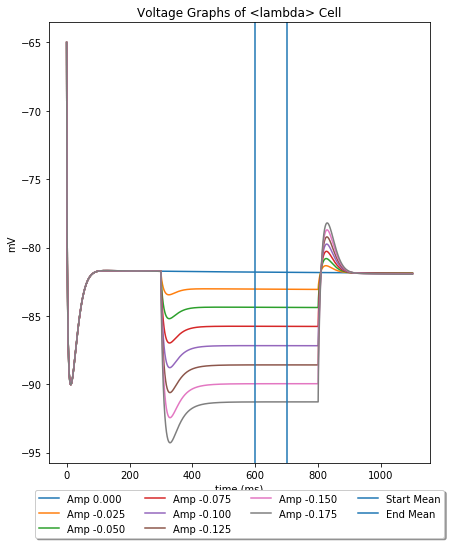

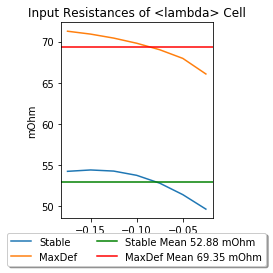

In [6]:
inputresistances = generic.calculateInputResistance(cellbuilder, mult=-0.025, iterations=8, plot=True, delay=300, duration=500)

In [52]:
inputresistances[0][0]

-0.025

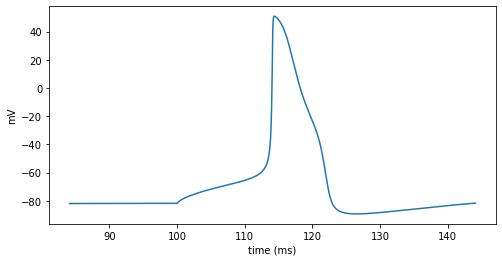

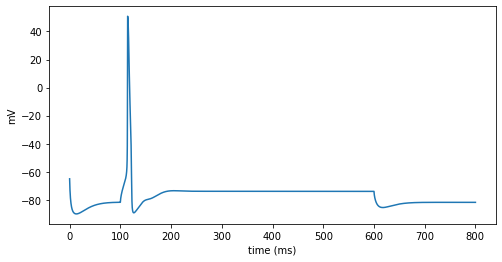

In [7]:
foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15)
aptime = foundtrace["aps"][0]
aptrace = generic.isolateTime(foundtrace, aptime,30)

generic.plotTrace(aptrace)
generic.plotTrace(foundtrace)

In [8]:
def phasePlanePlot(tracein):
    copytrace = copy.copy(tracein)
    time = copytrace["t"].max() - copytrace["t"].min()
    hertz = copytrace["t"].shape[0]/time
    dT = 1/hertz
    
    print(hertz)
    print(dT)

    vgradient = np.gradient(copytrace["v"],copytrace["t"]) # Is this correct?
    
    fig = pyplot.figure(figsize=(20,12)) # Default figsize is (8,6)
    ax = pyplot.subplot(131)
    voltage = copytrace["v"] 
    ax.plot(voltage,vgradient)
    ax.set_xlim(-80, 80)
    ax.set_ylim(-50,500)
    return tracein
    
    

40.01667361400896
0.024989583333331383


{'v': array([-81.87700562, -81.876591  , -81.8761771 , ..., -81.61531284,
        -81.60619986, -81.59710855]),
 't': array([ 84.125,  84.15 ,  84.175, ..., 144.05 , 144.075, 144.1  ]),
 'aps': array([114.125]),
 'cellbuilder': <function __main__.<lambda>()>,
 'params': {'dur': 500, 'delay': 100, 'amp': 0.25}}

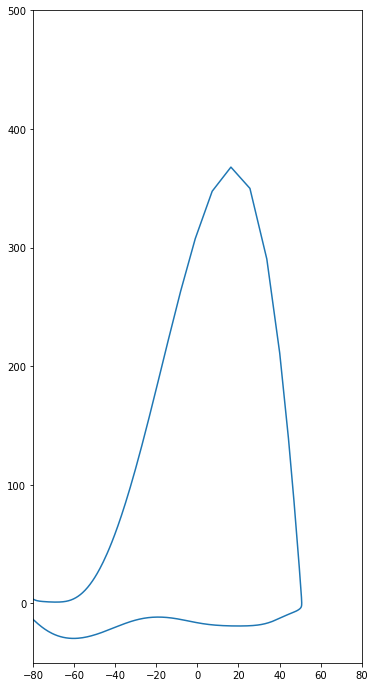

In [9]:
phasePlanePlot(aptrace)


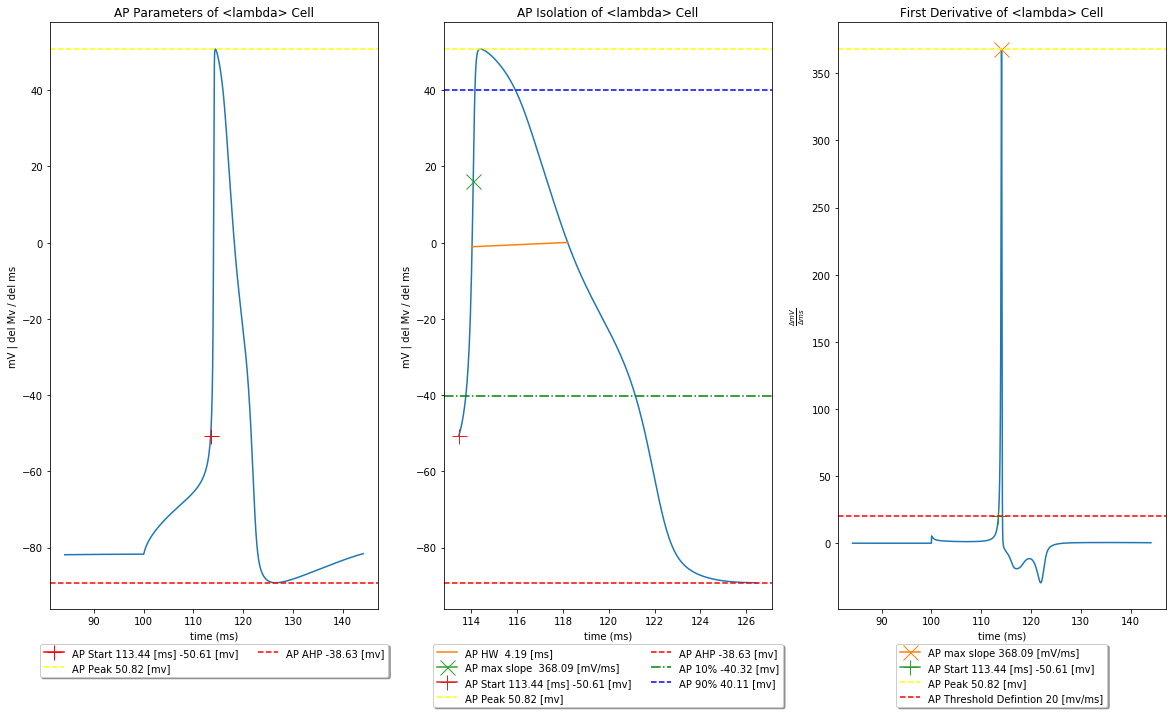

In [10]:
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)